# Bank Marketing Campaign

## Business Problem Understanding

### Background

Sektor perbankan merupakan jenis bisnis yang vital karena banyak digunakan oleh orang. Pada masa yang telah modern, terdapat berbagai bank yang siap melayani nasabah, salah satunya Bank X. Layaknya bank lain, Bank X memiliki berbagai macam produk perbankan seperti deposito berjangka. Dalam kasus ini, Bank X ingin membuat produk deposito berjangka menjadi lebih efektif dengan membuat kampanye pemasaran yang lebih efisien. Bermodalkan data pemasaran sebelumnya, Bank X ingin mengetahui nasabah mana yang kemungkinannya besar menempatkan uangnya pada produk deposito berjangka.

Target:

1 (Ya): Menempatkan uang di deposito berjangka

0 (Tidak): Tidak menempatkan uang di deposito berjangka

### Problem Statement

Proses pemasaran lumrah dilakukan oleh perusahaan yang ingin produknya digunakan oleh konsumen. Dalam hal ini, Bank X ingin melakukan pemasaran terhadap produk deposito berjangka. Bank ingin melakukan pemasaran yang lebih efisien dibanding pemasaran sebelumnya. Bank perlu menyaring dengan ketat nasabah mana yang akan mendepositkan uangnya. Jika pemasaran dilakukan kepada semua nasabah, maka akan memakan waktu dan biaya yang tidak sedikit. Sehingga pemasaran yang dilakukan tidak efisien. 

### Goals

Berdasarkan rumusan masalah tersebut, Bank X ingin memprediksi mana nasabah yang potensial mendepositkan uangnya dan yang tidak. Hal tersebut bertujuan agar Bank dapat fokus kepada nasabah yang potensial menempatkan uang pada produk deposito berjangka. Bank juga ingin mengetahui apa saja faktor yang mempengaruhi nasabah dalam memutuskan untuk mendepositkan uangnya. Faktor-faktor tersebut berguna bagi Bank untuk membuat langkah pendekatan yang lebih baik kepada nasabah potensial.

### Analytical Approach

Analisa yang dilakukan adalah mengetahui berbagai pola yang menjadi pembeda antara nasabah yang mendepositkan uangnya dan nasabah yang tidak. Lalu, perlu dibuat model klasifikasi yang dapat membantu Bank dalam memprediksi probabilitas nasabah yang ingin mendepositkan uangnya atau tidak.

### Metric Evaluation

Type 1 Error: False Positive

Dampak: Waktu dan biaya pemasaran menjadi sia-sia.

Type 2 Error: False Negative

Dampak: Kehilangan nasabah potensial.

Dari dua dampak tersebut, model yang dibuat harus mampu mengurangi biaya pemasaran agar menjadi lebih efisien. Namun, sebisa mungkin model yang dibuat tidak mengurangi nasabah potensial. Diharapkan model dapat memaksimalkan kelas positif yang valid (True Positive) dan meminimalkan kelas positif yang salah (False Positive). Metric yang tepat untuk digunakan adalah roc_auc.

## Import Library

In [37]:
# Pandas & Numpy
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from IPython.display import display
rcParams.update({'figure.autolayout': True})


# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from scikitplot.metrics import plot_roc_curve
import lightgbm as lgb

# Other
import pickle
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

## Data

Sumber Data: https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW

In [38]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
display(df.head(), df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


### Dataset Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Numerical | Umur customer |
| job | Categorical | Pekerjaan customer |
| balance | Numerical | Saldo customer |
| housing | Binary | Memiliki cicilan rumah|
| loan | Binary | Memiliki pinjaman bank pribadi |
| contact | Categorical | Tipe kontak komunikasi |
| month | Categorical | Waktu kontak terakhir |
| campaign | Numerical | Jumlah kontak yang dilakukan saat pemasaran |
| pdays | Numerical | Jumlah hari setelah dilakukan pemasaran terakhir |
| poutcome | Categorical | Hasil dari pemasaran terakhir |
| deposit | Binary | Customer berlangganan produk deposito |

## Data Understanding

Sebagai langkah pertama, kita perlu memahami terlebih dahulu data yang kita miliki. Tahapan pemahaman data dinamakan Data Understanding. Proses ini berguna untuk mengetahui apakah terdapat anomali di dalam dataset. Jika kita sudah mengetahui anomali yang ada, kita dapat menangani data sesuai dengan masalah yang dimiliki. Penanganan anomali harus memiliki dasar argumen yang sesuai dengan domain knowledge dan statistika.

In [39]:
print('Jumlah kolom dan baris pada dataset:', df.shape)
df.info()

Jumlah kolom dan baris pada dataset: (7813, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [40]:
display(df.describe(), df.describe(include=object))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [41]:
ListItem = []
for col in df.columns :
    ListItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100),
                    df[col].nunique(), df[col].unique()]);

DfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=ListItem)
DfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0,2,"[no, yes]"
4,loan,object,0,0,2,"[no, yes]"
5,contact,object,0,0,3,"[cellular, telephone, unknown]"
6,month,object,0,0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0,4,"[unknown, other, failure, success]"


Dari hasil pemaparan di atas, terlihat: 

1. Tidak ada data kosong pada masing-masing kolom.
2. Setiap kolom memiliki data yang berguna.
3. Data other dan unknown pada kolom poutcome memiliki maksud yang kurang jelas.
4. Data unknown pada kolom contact juga memiliki maksud yang kurang jelas.

## Data Cleaning

### Format Data

In [42]:
df['poutcome'] = df['poutcome'].replace({'unknown':'other'})
df[df['poutcome']=='other']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,other,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,other,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,other,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,other,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,other,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,other,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,other,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,other,no


In [43]:
df['job'] = df['job'].replace({'unknown':'other'})

In [44]:
df['contact'] = df['contact'].replace({'unknown':'other'})

In [45]:
ListItem = []
for col in df.columns :
    ListItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100),
                    df[col].nunique(), df[col].unique()]);

DfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=ListItem)
DfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0,2,"[no, yes]"
4,loan,object,0,0,2,"[no, yes]"
5,contact,object,0,0,3,"[cellular, telephone, other]"
6,month,object,0,0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0,3,"[other, failure, success]"


1. Data other dan unknown pada kolom poutcome memiliki maksud yang kurang jelas. Namun, kedua data tersebut tidak dapat dihapus karena tetap memiliki maksud tersendiri. Agar lebih efisien, data unknown sebenarnya dapat menjadi bagian dari data other. Oleh karena itu, data unknown digabung ke dalam data other.
2. Agar data yang dimiliki lebih seragam, data unknown pada kolom contact diubah juga menjadi other karena bisa saja jenis komunikasi tersebut menggunakan cara lain yang tidak disebutkan pada dataset.

### Duplicate Data

In [46]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7808    False
7809    False
7810    False
7811    False
7812    False
Length: 7813, dtype: bool

Pada dataset tidak ditemukan data duplikat.

### Missing Value

In [47]:
df.isna().sum()/df.shape[0]*100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

Pada dataset tidak ditemukan data kosong.

### Multi-colinearity

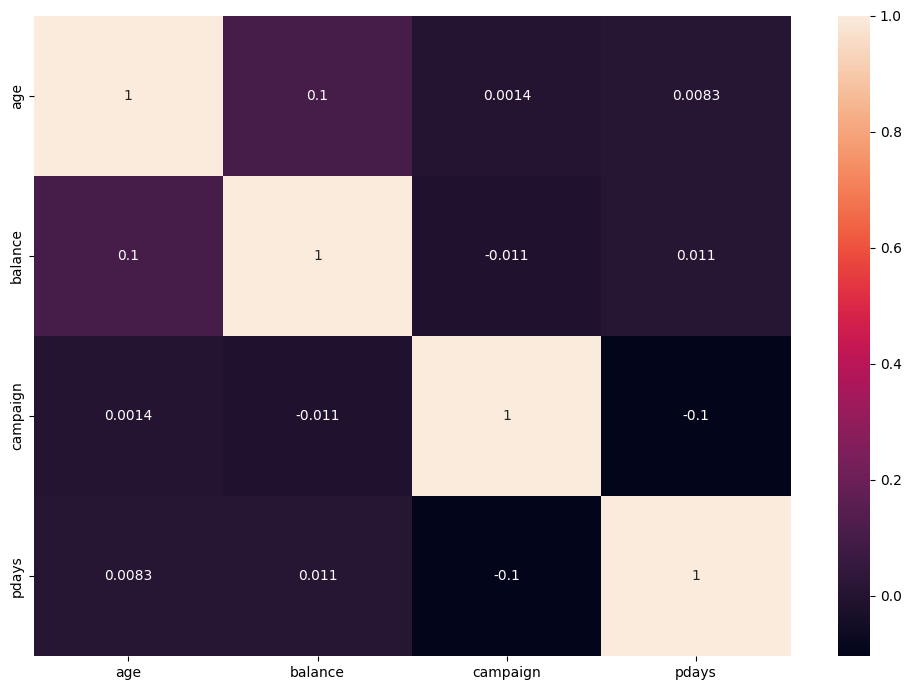

In [48]:
df_num = df[['age', 'balance', 'campaign', 'pdays']]
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot= True)
plt.show()

Heatmap di atas menunjukkan tidak adanya masalah multikoliniearitas antar kolom/fitur.

## Data Analysis

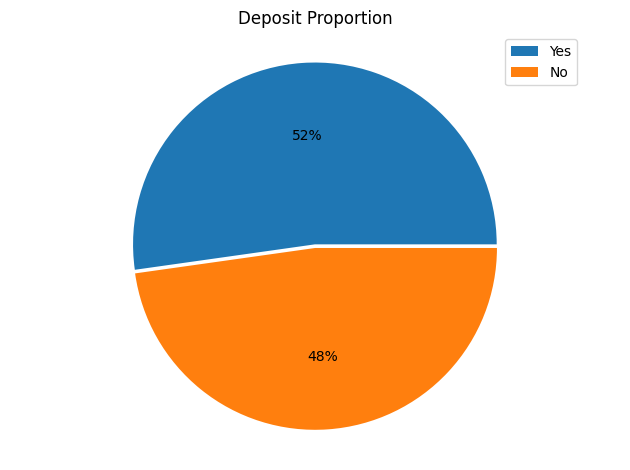

In [49]:
plt.gca().axis('equal')
df['deposit'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01))
plt.title('Deposit Proportion')
plt.legend(['Yes', 'No',], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Terlihat data yang dimiliki berdasarkan proporsi deposit cenderung seimbang (Balance).

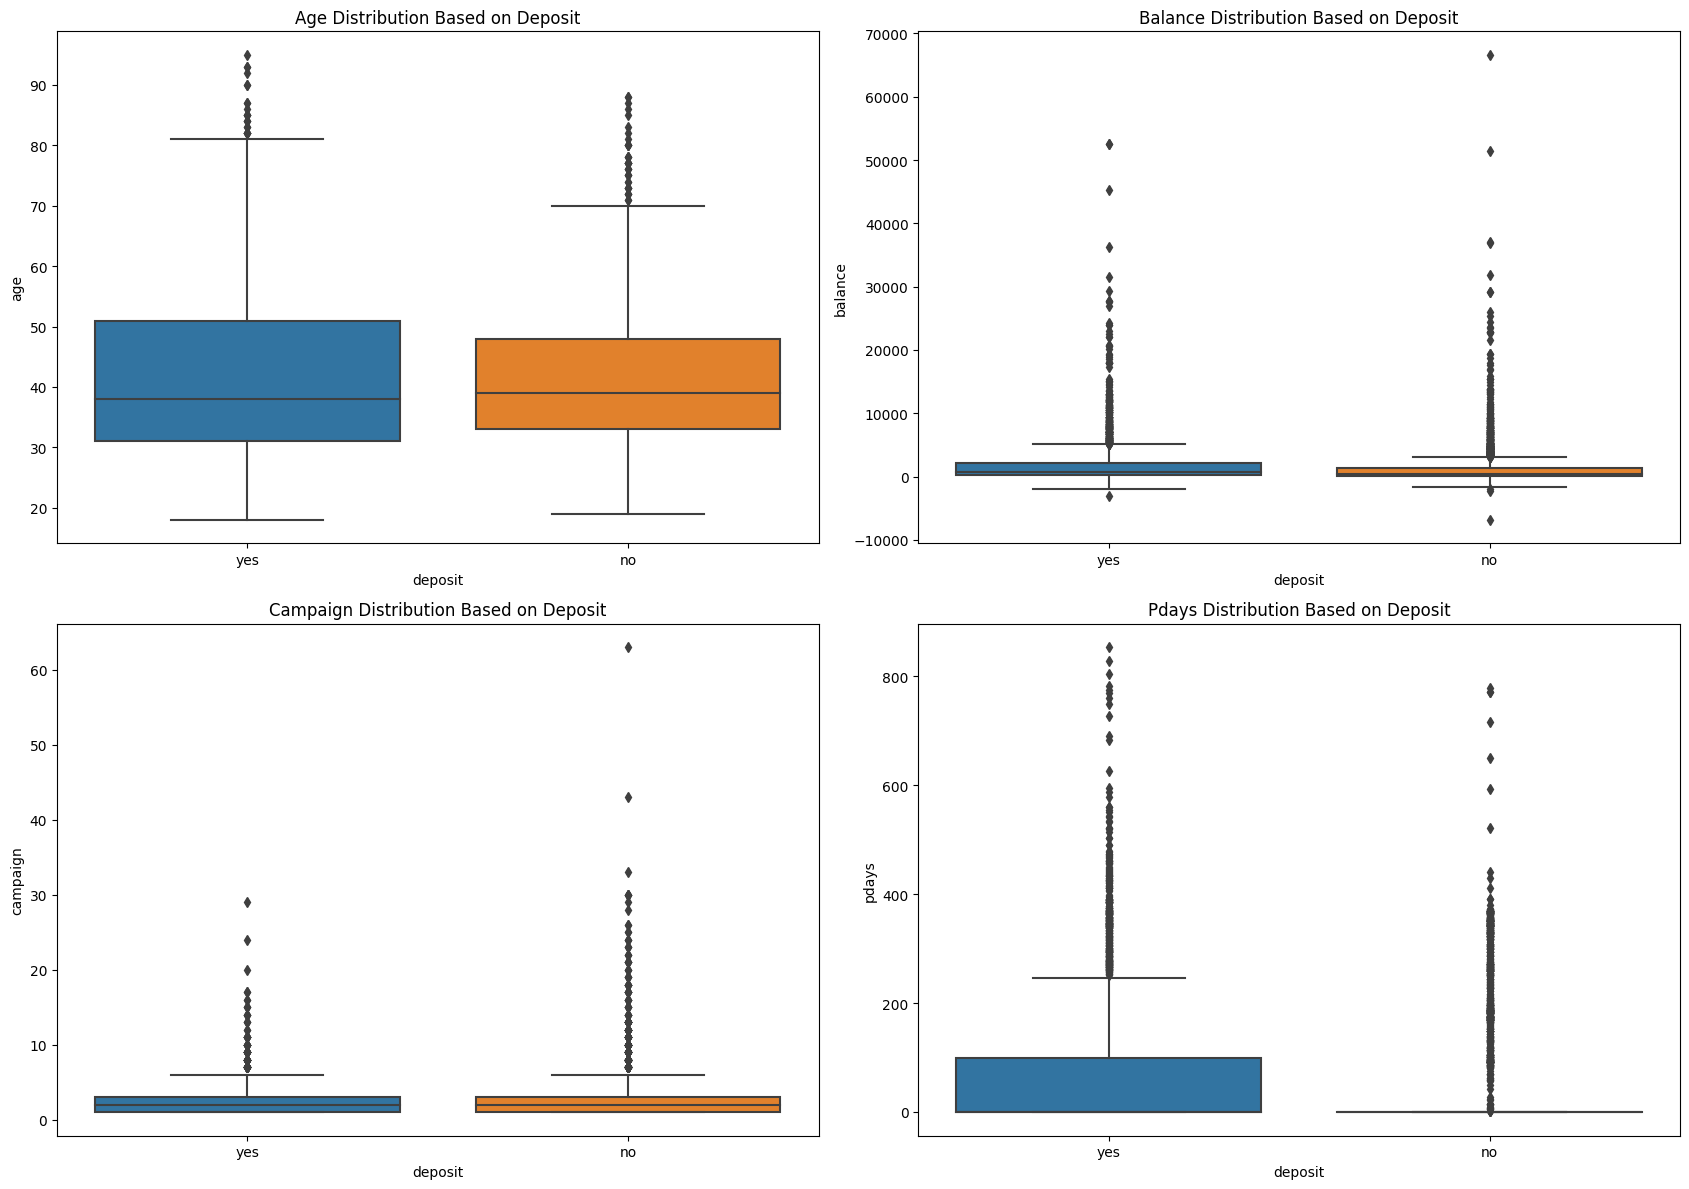

In [50]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df,x='deposit', y='age')
plt.title('Age Distribution Based on Deposit')

plt.subplot(222)
sns.boxplot(data=df,x='deposit', y='balance')
plt.title('Balance Distribution Based on Deposit')

plt.subplot(223)
sns.boxplot(data=df,x='deposit', y='campaign')
plt.title('Campaign Distribution Based on Deposit')

plt.subplot(224)
sns.boxplot(data=df,x='deposit', y='pdays')
plt.title('Pdays Distribution Based on Deposit')
plt.show()

Hasil Boxplot di atas menunjukkan visualisasi data numerikal terhadap deposit. Data age, balance, dan campaign memiliki kemiripan bentuk, bagian yang membedakan hanya data outlier saja. Terdapat perbedaan yang cukup signifikan pada data pdays (Jumlah hari setelah dilakukan pemasaran terakhir). Nasabah yang baru saja dihubungi (jumlah harinya sedikit) cenderung ingin mendepositkan uangnya.

Kedua visualisasi juga menampilkan bahwa keempat data numerikal tidak terdistribusi normal, keempat data tersebut memiliki banyak outlier. Namun, outlier akan dibiarkan saja karena keberadaannya memiliki dasar yang logis. Outlier tersebut akan berguna sebagai data pemodelan. Jika data outlier dihapus, dikhawatirkan akan mempengaruhi performa model.

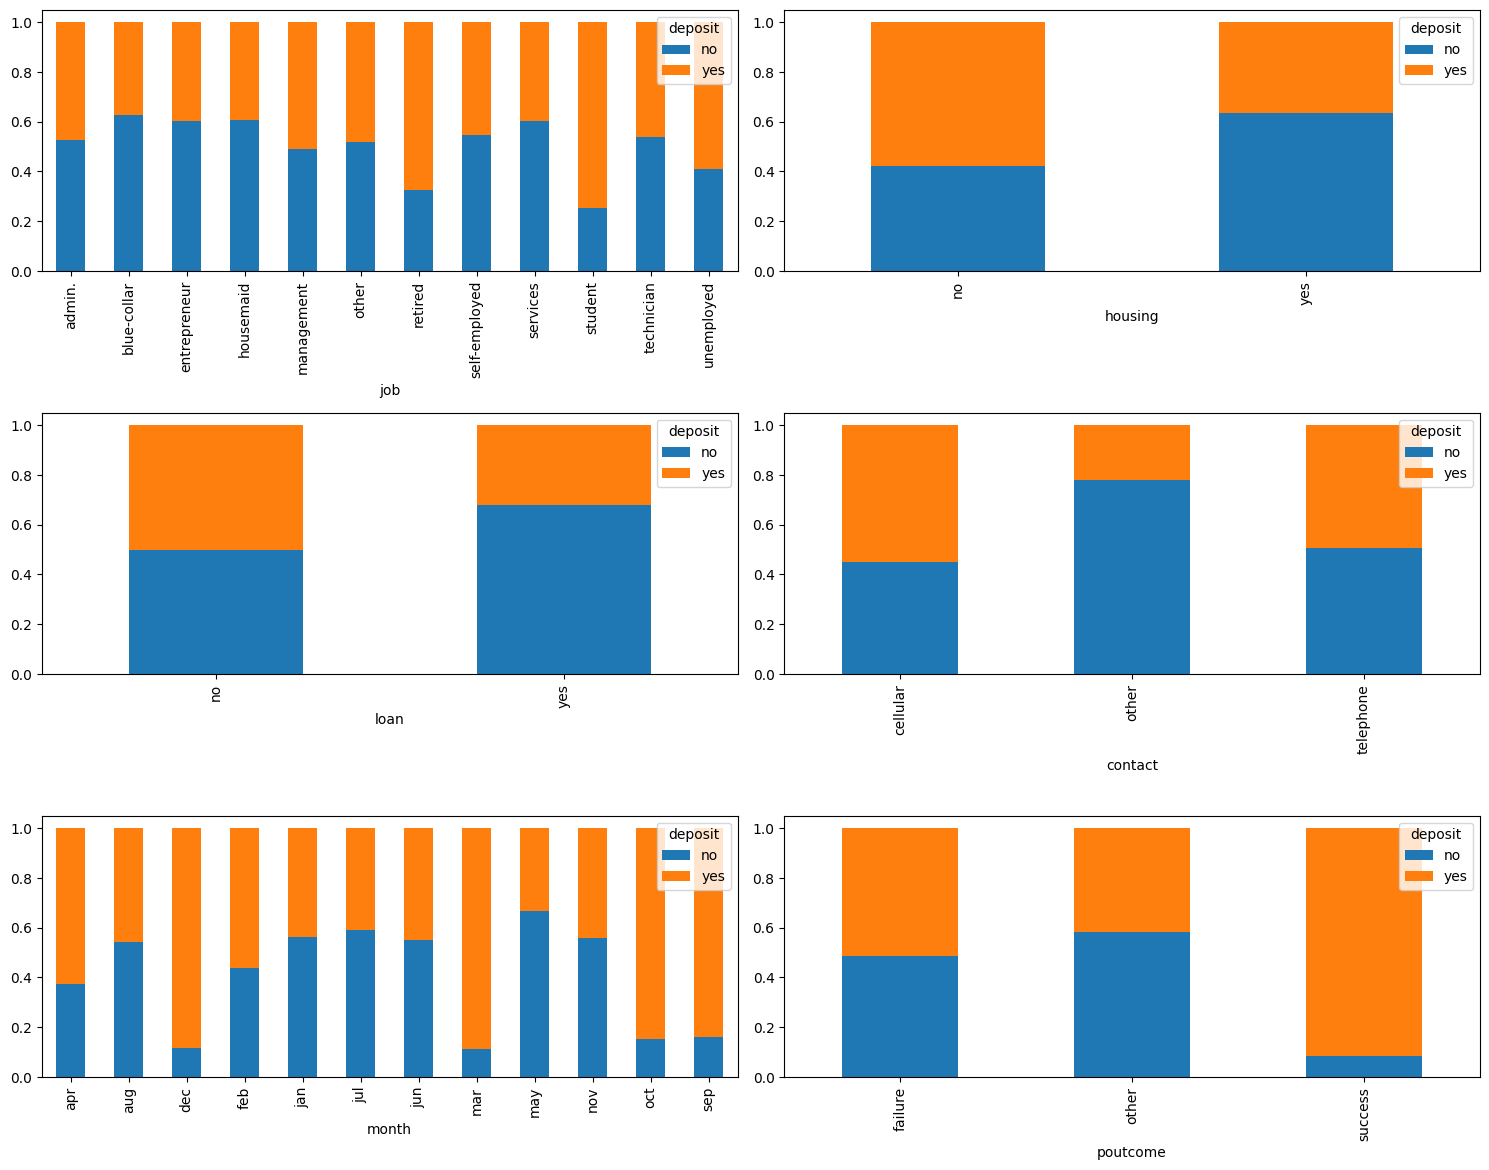

In [51]:
count = 0 
fig= plt.figure(figsize= (15,15))

for i in df[['job', 'housing', 'loan', 'contact', 'month', 'poutcome']].columns:
    count += 1
    ax = plt.subplot(4,2,count)
    pd.crosstab(df[i], df['deposit'], normalize= 0).plot(kind= 'bar', stacked= True, ax= ax)
    fig.tight_layout()

plt.show()

In [52]:
for i in df[['job', 'housing', 'loan', 'contact', 'month', 'poutcome']].columns:
    col = df.groupby(i)['deposit'].value_counts(normalize= True).unstack()
    display(col.sort_values(by=['yes'], ascending= False))

deposit,no,yes
job,,
student,0.255061,0.744939
retired,0.324074,0.675926
unemployed,0.409639,0.590361
management,0.489955,0.510045
other,0.518519,0.481481
admin.,0.525641,0.474359
technician,0.539117,0.460883
self-employed,0.546429,0.453571
entrepreneur,0.601695,0.398305


deposit,no,yes
housing,,
no,0.422947,0.577053
yes,0.634359,0.365641


deposit,no,yes
loan,,
no,0.498895,0.501105
yes,0.677734,0.322266


deposit,no,yes
contact,,
cellular,0.449183,0.550817
telephone,0.505495,0.494505
other,0.779134,0.220866


deposit,no,yes
month,,
mar,0.110553,0.889447
dec,0.117647,0.882353
oct,0.150350,0.849650
sep,0.160377,0.839623
apr,0.373112,0.626888
feb,0.436330,0.563670
aug,0.542857,0.457143
jun,0.550758,0.449242
nov,0.558600,0.441400


deposit,no,yes
poutcome,,
success,0.085414,0.914586
failure,0.487028,0.512972
other,0.580754,0.419246


Hasil Barplot di atas menunjukkan visualisasi data kategorikal terhadap deposit, yaitu:
    
1. Nasabah pelajar (`student`) dan pensiunan (`retired`) cenderung lebih tertarik untuk mendepositkan uangnya dibanding nasabah dengan latar belakang pekerjaan yang lain.
2. Nasabah yang tidak memiliki cicilan rumah (`housing: no`) cenderung lebih tertarik untuk mendepositkan uangnya dibanding nasabah yang memiliki cicilan rumah (`housing: yes`)
3. Nasabah yang tidak memiliki pinjaman bank pribadi (`loan: no`) cenderung lebih berminat untuk mendepositkan uangnya dari pada nasabah yang memiliki pinjaman bank pribadi (`loan: yes`)
4. Nasabah yang menggunakan HP (`cellular`) cenderung lebih berminat untuk mendepositkan uangnya dibanding nasabah yang menggunakan telepon (`telephone`) dan lainnya (`other`).
5. Nasabah yang dihubungi pada bulan Maret (`mar`), Desember (`dec`), Oktober (`oct`), dan September (`sept`) terlihat lebih tertarik untuk mendepositkan uangnya dibanding nasabah yang dihubungi pada bulan yang lain.
6. Nasabah yang sukses (`success`) pada pemasaran sebelumnya terlihat lebih berminat untuk mendepositkan uangnya dari pada nasabah yang gagal (`failure`) dan lainnya (`other`).

## Data Preparation

In [53]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,other,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,other,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,other,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,other,no


Fitur-fitur yang berupa data kategorikal akan di-encoding agar dapat digunakan pada pemodelan. Beberapa fitur tersebut terdiri dari `job`, `housing`, `loan`, `contact`, `month`, dan `poutcome`. Keenam fitur akan di-encoding menggunakan One Hot Encoder karena unique datanya yang sedikit dan masing-masing fitur tidak memiliki urutan (order). One Hot Encoder yang digunakan adalah default, salah satu kategori pada fitur yang di-encoding tidak akan didrop (`drop = 'first`). Tujuannya agar semua kategori yang ada muncul di dataframe, sehingga dapat memaksimalkan hasil prediksi.

In [54]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
    ], remainder= 'passthrough')

In [55]:
x = df.drop(columns= ['deposit'])
y = df['deposit']

In [56]:
x_train, x_test, y_train, y_test= train_test_split(
    x, 
    y, 
    stratify= y, 
    test_size=0.2, 
    random_state=12)

In [57]:
x_train_preprocessed = transformer.fit_transform(x_train).toarray()

In [58]:
testing = pd.DataFrame(x_train_preprocessed, columns= transformer.get_feature_names_out())
testing.head()

,onehot__job_admin.,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_other,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,...,onehot__month_nov,onehot__month_oct,onehot__month_sep,onehot__poutcome_failure,onehot__poutcome_other,onehot__poutcome_success,remainder__age,remainder__balance,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,31.0,168.0,2.0,-1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,49.0,0.0,3.0,-1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,30.0,2.0,1.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,58.0,3399.0,2.0,188.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,36.0,871.0,1.0,-1.0


## Modeling & Evaluation

### Model Benchmarking: K-Fold

In [59]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lgbm = lgb.LGBMClassifier()

estima = Pipeline([
    ('preprocess', transformer),
    ('Model', knn)
])
skfold= StratifiedKFold(n_splits=10, shuffle= True, random_state= 10)
hyperparams= {
    'Model' : [knn, logreg, rf, dt, lgbm]
}

grid_model = GridSearchCV(estima, param_grid= hyperparams, cv= skfold, scoring= 'roc_auc', n_jobs= -1)

In [60]:
grid_model.fit(x_train, y_train)
print(grid_model.best_score_)
print(grid_model.best_params_)
pd.DataFrame(grid_model.cv_results_).sort_values(by= 'rank_test_score').set_index('param_Model').drop('params', axis= True)

0.7718780865491913
{'Model': LGBMClassifier()}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_Model,,,,,,,,,,,,,,,,,
LGBMClassifier(),0.488800,0.076666,0.042400,0.011621,0.780465,0.746030,0.779998,0.782773,0.774299,0.788842,0.781674,0.752422,0.772787,0.759492,0.771878,0.013597,1
RandomForestClassifier(),10.878408,1.184748,0.079997,0.016977,0.762773,0.730969,0.774843,0.765886,0.747984,0.778780,0.762186,0.753961,0.755978,0.760965,0.759432,0.012875,2
LogisticRegression(),0.271200,0.017689,0.022800,0.003601,0.754314,0.728040,0.762870,0.770657,0.737530,0.763171,0.769770,0.736064,0.746649,0.768261,0.753733,0.014875,3
DecisionTreeClassifier(),0.527600,0.027097,0.020401,0.002153,0.631825,0.635072,0.630866,0.635898,0.691949,0.665548,0.660217,0.643587,0.624197,0.640149,0.645931,0.019653,4
KNeighborsClassifier(),0.071601,0.003774,1.335600,0.092563,0.627065,0.588957,0.595518,0.629799,0.608049,0.635567,0.609661,0.584349,0.632981,0.632509,0.614446,0.018677,5


Model yang dipilih untuk dilakukan benchmarking adalah KNeighbors Classifier, Logistic Regression, Random Forest Classifier, Decision Tree Classifier, dan LGBM Classifier. Berdasarkan hasil cross validation, model yang memiliki skor ROC AUC tertinggi adalah LGBMClassifier dengan nilai 0.771. Oleh karena itu, LGBM Classifier akan digunakan dalam pemodelan.

### Hyperparamater Tuning

Setelah mendapatkan model yang tepat, kita perlu melakukan tuning parameter model agar mendapatkan performa yang maksimal. Default parameter dari LGBM Classifier adalah `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, dan `learning_rate` = 0.1.

Sumber:
1. https://lightgbm.readthedocs.io/en/latest/Parameters.html
2. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [61]:
estimate= Pipeline([
    ('preprocess', transformer),
    ('lgbm', lgb.LGBMClassifier())
])

hyperparams = {
    'lgbm__num_leaves' : [1, 11, 21, 31, 41],
    'lgbm__min_data_in_leaf' : [15, 20, 25, 30, 45],
    'lgbm__max_bin' : [200, 225, 255, 275, 300],
    'lgbm__num_iterations' : [125, 150, 175, 200, 225],
    'lgbm__learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'lgbm__random_state' : [2023]
}

In [62]:
grid_hype = RandomizedSearchCV(
    estimator= estimate, 
    param_distributions= hyperparams, 
    scoring= 'roc_auc',
    cv= StratifiedKFold(n_splits= 10, shuffle= True, random_state= 10),
    n_jobs= -1,
    random_state= 2023
)

In [63]:
grid_hype.fit(x_train, y_train)
print(grid_hype.best_score_)
print(grid_hype.best_params_)
pd.DataFrame(grid_hype.cv_results_).sort_values(by= 'rank_test_score').set_index('rank_test_score')

0.7780826630947092
{'lgbm__random_state': 2023, 'lgbm__num_leaves': 11, 'lgbm__num_iterations': 175, 'lgbm__min_data_in_leaf': 25, 'lgbm__max_bin': 255, 'lgbm__learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lgbm__random_state,param_lgbm__num_leaves,param_lgbm__num_iterations,param_lgbm__min_data_in_leaf,param_lgbm__max_bin,param_lgbm__learning_rate,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,
1,0.475898,0.098591,0.041394,0.016278,2023,11,175,25,255,0.1,...,0.787251,0.801988,0.769113,0.791792,0.791577,0.757455,0.778621,0.766091,0.778083,0.015048
2,0.778027,0.062591,0.044801,0.007756,2023,41,150,15,255,0.01,...,0.796141,0.787554,0.765445,0.798329,0.780099,0.761052,0.781653,0.765521,0.777905,0.013995
3,0.423051,0.080442,0.039293,0.007362,2023,11,150,15,300,0.1,...,0.786964,0.795551,0.761880,0.795569,0.790807,0.763233,0.782356,0.769554,0.777143,0.016138
4,0.465199,0.045222,0.037200,0.012781,2023,21,125,25,200,0.001,...,0.779531,0.763886,0.765943,0.785743,0.762561,0.737511,0.751119,0.753407,0.757447,0.019414
5,0.564062,0.113227,0.047200,0.015880,2023,31,125,30,200,1,...,0.720684,0.727148,0.741151,0.730148,0.728280,0.722569,0.683958,0.701014,0.718021,0.016128
6,0.550329,0.093770,0.028836,0.013341,2023,31,200,45,225,10,...,0.579760,0.564438,0.613995,0.660679,0.561973,0.505480,0.510996,0.598598,0.571629,0.046979
7,0.465936,0.086475,0.024756,0.005005,2023,31,175,25,200,10,...,0.449079,0.604397,0.528485,0.631678,0.497301,0.586817,0.540422,0.611328,0.559141,0.053226
8,0.440464,0.085952,0.030832,0.008859,2023,21,125,15,200,10,...,0.509028,0.515137,0.533573,0.403480,0.562804,0.542126,0.497404,0.474206,0.512130,0.044001
9,0.072358,0.027688,0.000000,0.000000,2023,1,150,45,225,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan dataset yang dimiliki, hyperparameter terbaik LGBM adalah `num_leaves` = 11, `num_iterations` = 175, `min_data_in_leaf` = 25, `max_bin` = 255, dan `learning_rate` = 0.1. Hyperparameter `max_bin` dan `learning_rate` default valuenya masih yang terbaik, sehingga tidak ada perubahan value. Skor ROC AUC yang telah di-tuning mengalami sedikit peningkatan menjadi 0.778. Skor sebelumnya yang masih menggunakan default parameter adalah 0.771. 

Model LGBM dan hyperparameter yang telah didapat akan disimpan menjadi Tuned Model. Selanjutnya, akan dilakukan prediksi dengan Tuned Model menggunakan test set.


### Predict with Tuned Model

In [64]:
tuned_model = grid_hype.best_estimator_
tuned_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('lgbm',
                 LGBMClassifier(max_bin=255, min_data_in_leaf=25,
                                num_iterations=175, num_leaves=11,
                                random_state=2023))])

In [65]:
estimate.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('lgbm', LGBMClassifier())])

In [66]:
y_pred_def = estimate.predict(x_test)
y_pred_proba_def = estimate.predict_proba(x_test)
y_pred_tuned = tuned_model.predict(x_test)
y_pred_proba_tuned = tuned_model.predict_proba(x_test)

roc_auc_def = roc_auc_score(y_test, y_pred_proba_def[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Test LGBM Default: ', roc_auc_def)
print('ROC AUC Score Test LGBM Tuned: ', roc_auc_tuned)

ROC AUC Score Test LGBM Default:  0.7666425505945349
ROC AUC Score Test LGBM Tuned:  0.773479539071318


Hasil prediksi dengan tuned model pada test set menunjukkan model yang digunakan juga mengalami peningkatan setelah dilakukan tuning. Skor yang masih menggunakan default parameter adalah 0.766. Skor yang menggunakan tuned model adalah 0.773.

In [67]:
report_def = classification_report(y_test, y_pred_def)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Test LGBM Default: \n', report_def)
print('Classification Report Test LGBM Tuned: \n', report_tuned)

Classification Report Test LGBM Default: 
               precision    recall  f1-score   support

          no       0.69      0.80      0.74       816
         yes       0.74      0.61      0.67       747

    accuracy                           0.71      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.72      0.71      0.71      1563

Classification Report Test LGBM Tuned: 
               precision    recall  f1-score   support

          no       0.69      0.81      0.75       816
         yes       0.75      0.61      0.67       747

    accuracy                           0.71      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.72      0.71      0.71      1563



Berdasarkan Classification Report, terjadi sedikit peningkatan pada tuned model. Terlihat dari nilai precision, recall, dan f1-score.

### Feature Importances

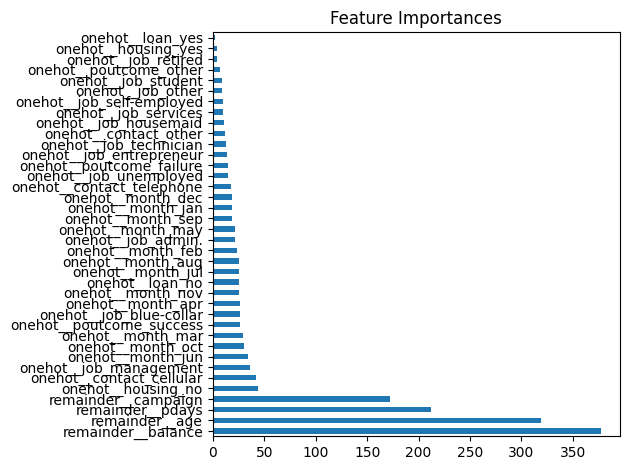

In [68]:
feature_coef = pd.Series(tuned_model['lgbm'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending= False)
feature_coef.plot(kind= 'barh', title= 'Feature Importances')
plt.show()

Barplot di atas menunjukkan 10 dari keseluruhan fitur. 10 fitur tersebut merupakan 10 teratas yang berpengaruh terhadap target (deposit). Fitur `balance`, `age`, `pdays`, dan `campaign` menjadi fitur yang sangat signifikan berpengaruh. Hal tersebut dapat dilihat dari ketimpangan bar keempat fitur dengan fitur lainnya. Jika dilihat kembali, keseluruhan fitur tersebut memiliki data numerikal. Dapat diasumsikan model yang dibuat sangat dipengaruhi oleh data numerikal.

## Conclusion & Recommendation

In [69]:
print('Classification Report LGBM Tuned: \n', report_tuned)

Classification Report LGBM Tuned: 
               precision    recall  f1-score   support

          no       0.69      0.81      0.75       816
         yes       0.75      0.61      0.67       747

    accuracy                           0.71      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.72      0.71      0.71      1563




Penarikan kesimpulan dari classification report di atas adalah model mampu mengurangi 81% nasabah yang tidak tertarik. Sebagai contoh, dari 100 nasabah yang secara aktual tidak tertarik, model mampu memprediksi 81 nasabah dengan benar. Namun, sisanya yang berjumlah 19 diprediksi sebagai nasabah yang tertarik. Model mampu mengurangi 81 nasabah yang tidak tertarik agar tidak dilakukan pendekatan (pemasaran). Model juga mampu mendapatkan 61% nasabah yang benar-benar tertarik (berdasarkan recall). Contoh tambahan, dari 100 nasabah yang tertarik secara riil, model mampu memprediksi 61 nasabah dengan benar. Tetapi, sisanya yang berjumlah 39 diprediksi sebagai nasabah yang tidak tertarik.

Model memiliki ketepatan prediksi terhadap kandidat yang tertarik sebesar 75%. Contohnya, dari 100 orang yang diprediksi model sebagai nasabah yang tertarik, model mampu mendapatkan 75 orang nasabah yang tertarik dengan benar (berdasarkan precision).

Salah satu cara Bank X melakukan pemasaran terhadap nasabah dengan menggunakan telepon, meskipun cara lain dapat saja digunakan karena pada fitur `contact` terdapat data ketegorikal berupa `other`. Asumsikan saja cara yang paling dominan digunakan oleh Bank X menggunakan telepon. Mengontak nasabah melalui telepon tentu saja memakan biaya. Diasumsikan biaya sekali telepon untuk mengontak nasabah sebesar 10$. Andaikan jumlah nasabah yang dimiliki dalam suatu periode berjumlah 200 orang, terdiri dari 100 orang tertarik dan 100 orang sisanya tidak tertarik. Perhitungannya sebagai berikut:

Tanpa Model (semua nasabah dikontak):
- Total Biaya: 200 nasabah x $10 = $2000
- Nasabah tertarik yang didapat: 100 orang (semua nasabah dikontak)
- Nasabah tertarik yang tidak didapat: 0 orang (semua nasabah dikontak)
- Biaya terbuang: 100 nasabah x $10 = $1000
- Penghematan: $0

Menggunakan Model (nasabah yang dikontak berdasarkan hasil prediksi model):
- Total Biaya: (61 nasabah x $10) + (19 nasabah x $10) = $800
- Nasabah tertarik yang didapat: 61 nasabah (berdasarkan recall `yes`: 61%)
- Nasabah tertarik yang tidak didapat: 39 nasabah (berdasarkan selisih recall `yes`: 100% - 61% = 39%)
- Biaya terbuang: 19 nasabah x $10 = $190 (berdasarkan selisih recall `no`: 100% - 81% = 19%)
- Penghematan: 81 nasabah x $10 = $810 (berdasarkan recall `no`: 81%)

Perhitungan tersebut menunjukkan bahwa model yang dibuat dapat melakukan penghematan anggaran perusahaan secara signifikan. Model tersebut masih mampu mempertahankan kuantitas nasabah dengan tidak mengurangi terlalu banyak nasabah potensial.

## Recommendation

1. Bank X perlu lebih detail terhadap data nasabah. Sebisa mungkin kurangi kategori data `(unknown)` dan `(other)` seperti pada fitur `contact` dan `poutcome`. Kedua kategori tersebut kurang merepresentasikan nasabah.
2. Mengingat data numerikal berpengaruh signifikan terhapad model yang dibuat, Bank X perlu mengubah tipe data pada beberapa fitur yang dapat diubah menjadi data numerikal, seperti fitur `housing` dan `loan`. Fitur tersebut dapat diubah menjadi data numerikal yang berisi nominal cicilan dan pinjaman nasabah
3. Bank X perlu menambah beberapa fitur lain yang dapat berpengaruh terhadap model, terutama fitur yang memiliki data numerikal. Bank X dapat menambah data pendapatan perbulan, pengeluaran nasabah perbulan, jumlah anak, dan pinjaman di bank lain
4. Jika dilakukan penambahan data, perlu dilihat apakah model masih relevan atau tidak karena pasti setiap model memiliki limitasi/batasan tersendiri. Bank dapat melakukan pemilihan model kembali yang sesuai dengan kondisi data terbaru. Tambahkan pula model yang lebih kompleks.
5. Perlu diketahui bahwa setiap model memiliki limitasi/batasan. Model yang dibuat saat ini hanya cocok pada dataset yang balance. Jika data terbaru memiliki data yang imbalance, perlu dilakukan pendekatan oversampling atau undersampling, tergantung dari kondisi data terbaru. Jika terjadi penambahan data, tidak menutup kemungkinan model saat ini mememiliki masalah overfitting. Perlu dilakuan perlakukan khusus agar masalah overfitting dapat dihindari.

## Save Model

In [70]:
# Save Model 
estimate.fit(x_train, y_train)
filename = 'Model_Bank_Marketing_Campaign.sav'
pickle.dump(estimate, open(filename, 'wb'))

# Load Model
filename = 'Model_Bank_Marketing_Campaign.sav'
loaded_model = pickle.load(open(filename, 'rb'))